In [1]:
!pip install xgboost
!pip install flask


In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from flask import Flask, request, jsonify
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load the dataset (Modify the file path based on your system)
file_path = r"C:\Users\O\OneDrive\Desktop\AIDI\sem 2\AI ENTERPRISE\Fish.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


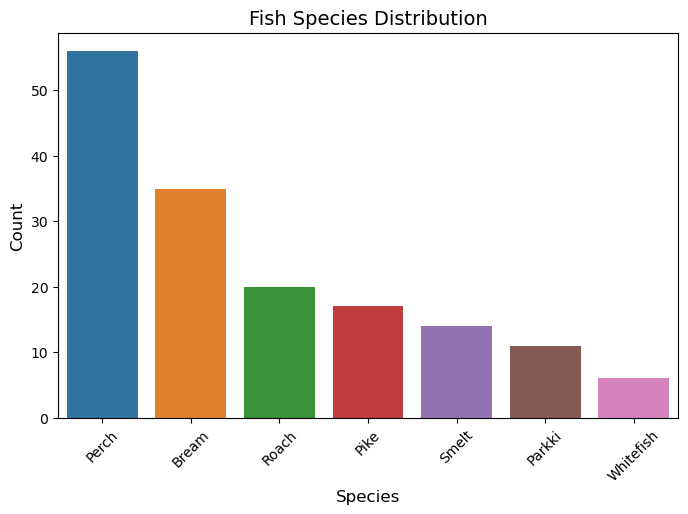

In [4]:
# Set plot style
plt.figure(figsize=(8, 5))

# Create a count plot for species distribution
sns.countplot(x=df['Species'], order=df['Species'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title("Fish Species Distribution", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

In [5]:
# Check for missing values in the dataset
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [6]:
# Encode categorical 'Species' column
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

# Define features (X) and target (y)
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Species_encoded']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler & label encoder
joblib.dump(scaler, "Fish scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Data preprocessing complete.")

Data preprocessing complete.


In [7]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the trained model
joblib.dump(xgb_model, "Fish Model.pkl")

print("Model training complete and saved.")


Model Accuracy: 0.7500
Classification Report:
               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.55      0.67      0.60         9
        Pike       1.00      0.67      0.80         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.75        32
   macro avg       0.65      0.62      0.63        32
weighted avg       0.75      0.75      0.74        32

Model training complete and saved.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Load the saved model, scaler, and label encoder
model = joblib.load("Fish Model.pkl")
scaler = joblib.load("Fish Scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

print("Model, Scaler, and Encoder loaded successfully.")


Model, Scaler, and Encoder loaded successfully.
